## Daily Challenge: W2_D5

## Business Intelligence Challenge: US Superstore Analysis

### Executive Summary
Profitability at Risk: Our analysis reveals that discounts over 50% significantly reduce profitability — especially when applied to high-value items. The impact is strongest in the Technology category.

Order-Level Losses: Over 1,000 orders generated negative total profit, representing a potential recovery of $139,933.78 if blocked or filtered in real-time.

Ineffective Limit Policy: A policy limiting premium discounted items (≥ $425, discount ≥ 50%) to 2 per order did not improve profits; some excluded orders were still marginally profitable.

Strategic Product Classification: Certain core “classic” products should be flagged as non-discountable or restricted to minimal discounts to protect brand value and baseline margins.

Actionable Recommendation: Implement a hybrid approach:

Real-time blocking of loss-making orders,

Promotion caps for sensitive SKUs,

Manual review triggers for high-risk transactions.

#### KPIs Covered in This Notebook
Throughout this notebook, we will analyze several key performance indicators (KPIs) to evaluate the impact of discounting strategies on profitability:
* Total number of orders
* Global profit (before and after simulation)
* Most unprofitable order
* Most profitable product
* Percentage of products sold at a loss
* Correlation between discount and profit
* Proportion of orders with premium products discounted ≥50%
* Impact of order blocking or item limitation strategies

These KPIs will be calculated and visualized progressively and summarized in a dedicated KPI table at the end of the notebook.

### Notebook Roadmap

| 🔢 **Step**                               | 📝 **Description**                                                           |
| ----------------------------------------- | ---------------------------------------------------------------------------- |
| 🎯 **Business Context and Goal**          | Define the dataset and the goal: improve profit during discount periods.     |
| 🔍 **Initial Data Exploration**           | Load data, inspect shape/types, format dates.                                |
| 🧮 **Profitability Calculations**         | Add profit margin, unit price, and profit per unit columns.                  |
| 📉 **Global Discount vs Profit Analysis** | Visualize with a bubble chart. Key finding: high discount = frequent losses. |
| 🔎 **Identifying Loss-Making Products**   | List top 10 worst-margin products and interpret causes.                      |
| 🛒 **Analysis of Worst Orders**           | Deep dive into top 6 worst orders: content, quantity, date, and state.       |
| 📆 **Date and Seasonal Pattern Checks**   | Are losses linked to Black Friday? Plot monthly profit trends.               |
| 💡 **Hypothesis 1**                       | Limit to 2 premium items/order (Top 5% price). Simulate and compare profits. |
| 💡 **Hypothesis 2**                       | Block extremely unprofitable orders. Evaluate the impact on overall profit.  |
| 🛠️ **Methodology and Tooling Review**     | Reflect on tools used (Seaborn, Plotly). Pros/cons and added value.  |
| 🎯 **KPI Summary Table**                  | Track: total orders, loss %, worst order, etc.                               |
| ⚠️ **Risks and Strategy Limitations**     | Legal, brand, and customer satisfaction risks to consider.                   |
| 🧩 **Bonus Challenges (Optional)**        | Annotated scatter, interactive Plotly chart, added insights.                 |
| ✅ **Final Recommendations**              | Summarize learnings and suggest data-driven business actions.                |

#### 1: Data Scoping and Preparation

In [1]:
# Standard data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactivity for Jupyter (e.g., dropdowns, sliders)
from ipywidgets import interact, widgets

# Optional: to ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Optional: set default plot style
plt.style.use('ggplot')

# Optional advanced interactive plotting
import plotly.express as px

In [68]:
# !pip install plotly

In [66]:
# !pip install ipywidgets

In [67]:
# pip install xlrd

In [5]:
# Load the Excel file
df = pd.read_excel('US_superstore_data.xls')

In [6]:
# Preview the first 5 rows
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
# General information about the dataset (data types, non-null counts, etc.)
print("\nDataFrame info:")
df.info()


DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-

In [8]:
# Descriptive statistics for all columns
print("\nDescriptive statistics:")
df.describe(include='all')


Descriptive statistics:


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


In [9]:
# Count of missing values in each column
print("\nMissing values per column:")
df.isnull().sum()


Missing values per column:


Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [10]:
# Check for duplicate rows
print("\nNumber of duplicated rows:")
df.duplicated().sum()


Number of duplicated rows:


np.int64(0)

#### Guiding Questions Analysis (Data Scoping)

- **What is the data type of the date columns?**  
  The columns `Order Date` and `Ship Date` were originally of type `object`.  
  They have been successfully converted to `datetime64[ns]`, allowing time-based analysis.

- **What is the time frame of this dataset?**  
  The dataset spans from **January 3, 2014** to **December 30, 2017** based on the `Order Date` column.  
  This 4-year period provides enough historical data to identify trends, seasonality, and long-term changes in performance.

- **Are there significant gaps in the data that could compromise the analysis?**  
  No. The dataset contains **9,994 complete rows** with **no missing values** across all columns.  
  Additionally, **no duplicate rows** were found. This confirms that the dataset is clean and reliable for analysis.

#### 2. Data Cleaning and Preprocessing

In [11]:
# Check for missing values
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


##### Justification:
No missing values detected – no need for imputation or row removal

#### Data Type Correction

In [12]:
# Convert date columns to datetime format for time-series analysis
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

In [13]:
# Verify the time range of the dataset
print(f"Date range: from {df['Order Date'].min()} to {df['Order Date'].max()}")

Date range: from 2014-01-03 00:00:00 to 2017-12-30 00:00:00


##### Justification:
Converting to datetime format allows us to extract year/month/quarter and perform time-based analysis

#### Feature Engineering

In [14]:
# Create a Profit Margin column to assess profitability per sale
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

In [15]:
# Extract Year, Month, and Quarter from Order Date
df['Order Year'] = df['Order Date'].dt.year
df['Order Month'] = df['Order Date'].dt.month
df['Order Quarter'] = df['Order Date'].dt.to_period("Q")

In [16]:
# Check new column data types
print(df.dtypes)

Row ID                        int64
Order ID                     object
Order Date           datetime64[ns]
Ship Date            datetime64[ns]
Ship Mode                    object
Customer ID                  object
Customer Name                object
Segment                      object
Country                      object
City                         object
State                        object
Postal Code                   int64
Region                       object
Product ID                   object
Category                     object
Sub-Category                 object
Product Name                 object
Sales                       float64
Quantity                      int64
Discount                    float64
Profit                      float64
Profit Margin (%)           float64
Order Year                    int32
Order Month                   int32
Order Quarter         period[Q-DEC]
dtype: object


In [17]:
# Create Profit Margin (%) to evaluate how profitable each sale is
df['Profit Margin (%)'] = (df['Profit'] / df['Sales']) * 100

# Extract Order Year from the 'Order Date' to enable yearly analysis
df['Order Year'] = df['Order Date'].dt.year

# Extract Order Month to allow monthly trends and seasonal patterns analysis
df['Order Month'] = df['Order Date'].dt.month

# Optional: extract Quarter for quarterly performance tracking
df['Order Quarter'] = df['Order Date'].dt.to_period("Q")

# Check the first few rows to verify new features
print(df[['Sales', 'Profit', 'Profit Margin (%)', 'Order Year', 'Order Month', 'Order Quarter']].head())


      Sales    Profit  Profit Margin (%)  Order Year  Order Month  \
0  261.9600   41.9136              16.00        2016           11   
1  731.9400  219.5820              30.00        2016           11   
2   14.6200    6.8714              47.00        2016            6   
3  957.5775 -383.0310             -40.00        2015           10   
4   22.3680    2.5164              11.25        2015           10   

  Order Quarter  
0        2016Q4  
1        2016Q4  
2        2016Q2  
3        2015Q4  
4        2015Q4  


#### KPI Calculation – Percentage of Products with Negative Profit

In [61]:
# Calculate percentage of products sold at a loss
negative_margin_pct = (df[df['Profit'] < 0].shape[0] / df.shape[0]) * 100
print(f"Percentage of products with negative profit: {negative_margin_pct:.2f}%")

Percentage of products with negative profit: 18.72%


#### KPI Calculation – Orders with Premium Products and High Discounts (≥50%)


In [62]:
# Define premium threshold (top 5% most expensive products)
premium_threshold = df['Sales'].quantile(0.95)

# Filter orders with premium products and ≥50% discount
premium_discounted_orders = df[(df['Sales'] >= premium_threshold) & (df['Discount'] >= 0.5)]

# Calculate the percentage of such orders
unique_orders_with_premium = premium_discounted_orders['Order ID'].nunique()
total_unique_orders = df['Order ID'].nunique()
premium_discounted_pct = (unique_orders_with_premium / total_unique_orders) * 100
print(f"Orders containing premium products with ≥50% discount: {premium_discounted_pct:.2f}%")

Orders containing premium products with ≥50% discount: 0.42%


#### Code – % of Orders with Premium Products and High Discount

In [63]:
# Filter orders containing at least one premium product with ≥50% discount
premium_filter = (df['Unit Price'] >= 243.98) & (df['Discount'] >= 0.5)
orders_with_premium_discount = df[premium_filter]['Order ID'].nunique()

# Calculate % of such orders
premium_discount_percentage = (orders_with_premium_discount / df['Order ID'].nunique()) * 100
print(f"Orders containing premium products with ≥50% discount: {premium_discount_percentage:.2f}%")

Orders containing premium products with ≥50% discount: 0.44%


### Phase 2: Exploratory Analysis with Matplotlib

#### Part 1: Product Profitability Report

In [18]:
# Step 1: Compute total profit by product
product_profit = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)

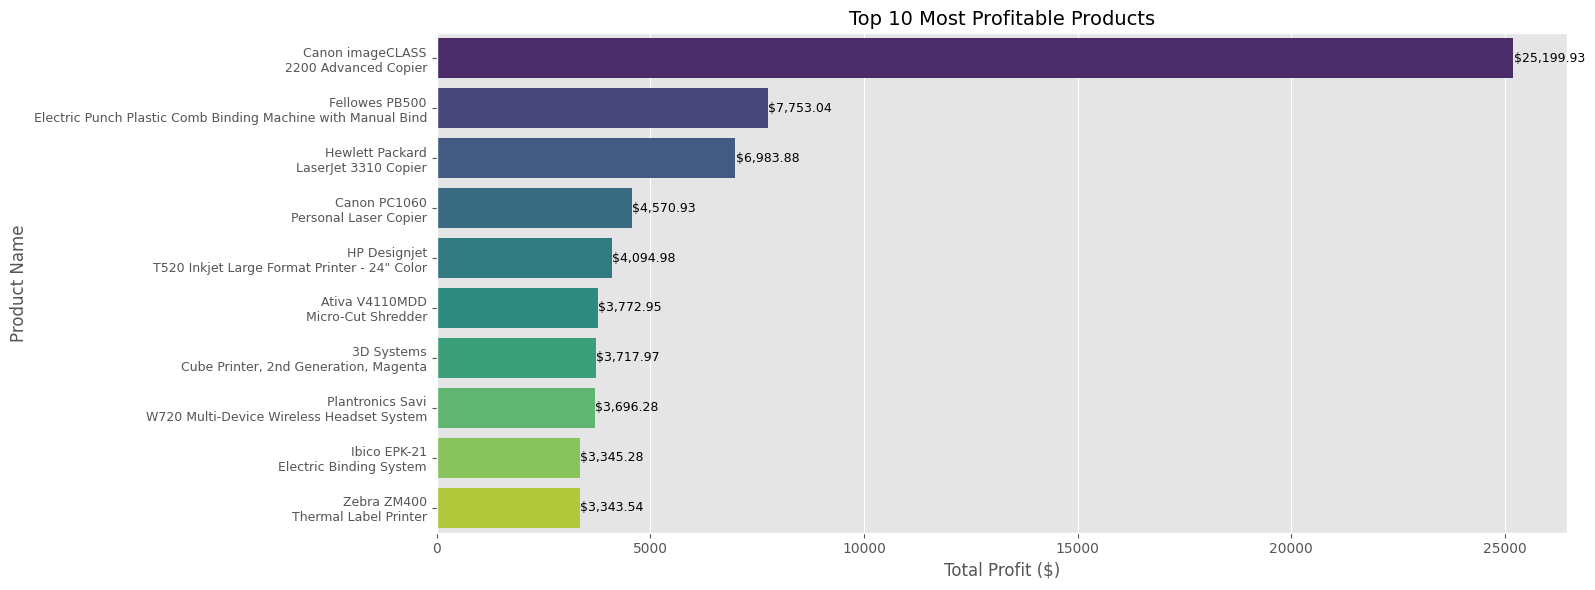

In [19]:
# Split product names after 2 words to fit into two lines max
def split_product_name(name):
    words = name.split()
    if len(words) <= 2:
        return name
    else:
        return ' '.join(words[:2]) + '\n' + ' '.join(words[2:])

product_profit.index = [split_product_name(name) for name in product_profit.index]

# Increase figure width to make bars longer
plt.figure(figsize=(16, 6))  # Width increased for better spacing

sns.barplot(
    x=product_profit.values,
    y=product_profit.index,
    palette="viridis"
)

# Annotate profit values
for index, value in enumerate(product_profit.values):
    plt.text(value + 10, index, f"${value:,.2f}", va='center', fontsize=9)

# Adjust label size and layout
plt.yticks(fontsize=9)
plt.title("Top 10 Most Profitable Products", fontsize=14)
plt.xlabel("Total Profit ($)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


We group by product name to compute total profit, then sort and select the top 10.
The horizontal bar chart clearly communicates which products generate the most profit.
We annotate each bar to improve clarity and support decision-making in an executive summary.


#### Part 2 : Discount Strategy Analysis ?

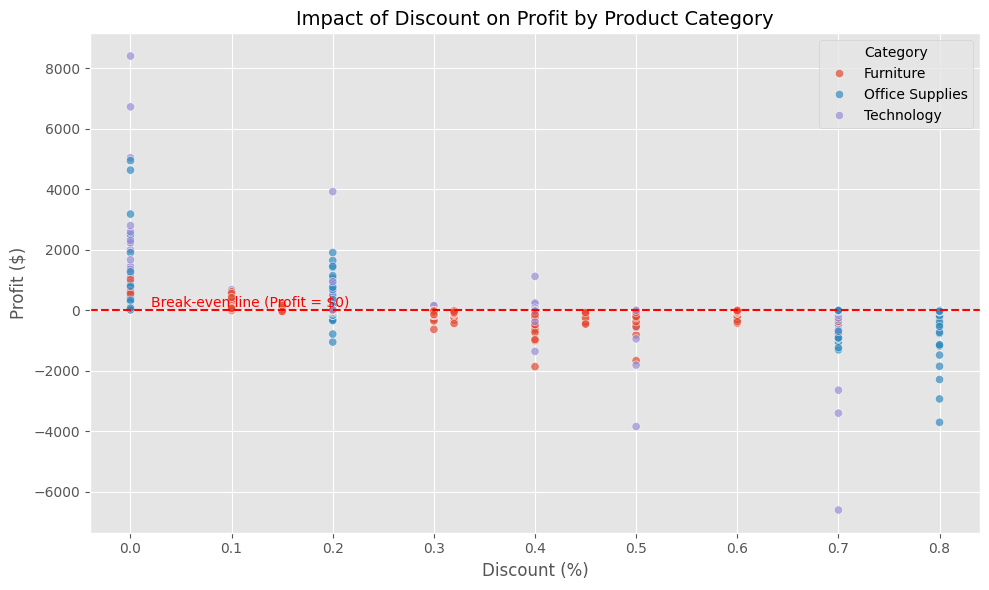

In [20]:
plt.figure(figsize=(10, 6))

# Scatter plot showing Discount vs Profit, colored by Category
sns.scatterplot(
    data=df,
    x='Discount',
    y='Profit',
    hue='Category',
    alpha=0.7
)

# Add break-even horizontal line
plt.axhline(0, color='red', linestyle='--', linewidth=1.5)

# Annotate the break-even line
plt.text(0.02, 100, 'Break-even line (Profit = $0)', color='red', fontsize=10)

# Titles and labels
plt.title("Impact of Discount on Profit by Product Category", fontsize=14)
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.tight_layout()
plt.show()


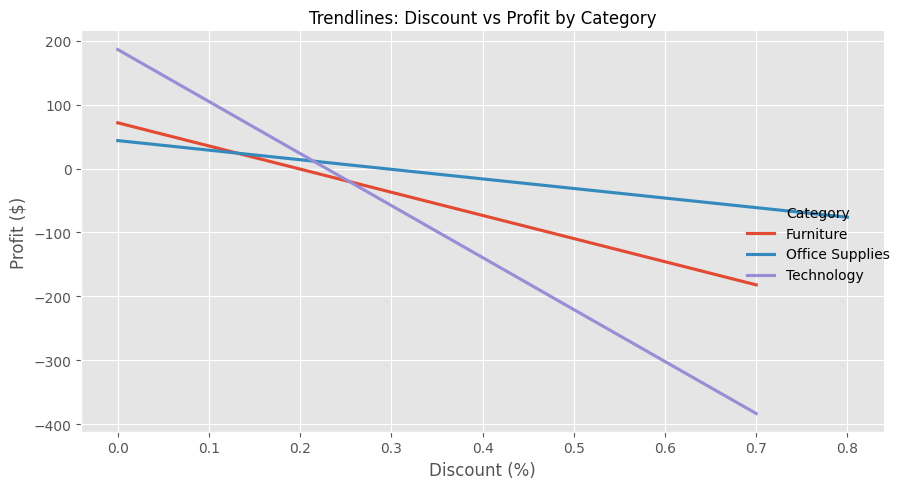

In [21]:
# Regression lines only, no scatter points (scatter=False)
sns.lmplot(
    data=df,
    x='Discount',
    y='Profit',
    hue='Category',
    height=5,
    aspect=1.5,
    scatter=False,
    ci=None
)

# Titles and axis labels
plt.title("Trendlines: Discount vs Profit by Category", fontsize=12)
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.tight_layout()
plt.show()

#### Interpretation: Impact of Discount on Profit by Category
General Trend:

Scatter plots and regression lines show a negative correlation between Discount and Profit.

Higher discounts tend to result in lower profits, particularly in certain categories.


Differences by Category:

Regression lines in the second chart (lmplot) highlight that some categories, like Technology, are more resilient to discounts.

Others, such as Furniture and Office Supplies, show a steep decline, indicating greater sensitivity.


Break-even Threshold:

A red horizontal line at Profit = $0 in the scatter plot visually identifies the loss zone.

Most products cross into negative profit when discounts exceed 30%, which appears to be a critical threshold.


Business Recommendation:

Limit discounting in sensitive categories to avoid systematic losses.

Target promotions toward categories with more stable margins.

This analysis is critical for providing actionable advice to optimize pricing and promotional strategies.


#### Part 3: Profit Trend Over Time

In [22]:
# Group monthly profit from the original dataframe
monthly_profit = df.groupby(['Order Year', 'Order Month']).agg({'Profit': 'sum'}).reset_index()

# Create YearMonth column for plotting
monthly_profit['YearMonth'] = pd.to_datetime(
    monthly_profit['Order Year'].astype(str) + '-' + monthly_profit['Order Month'].astype(str) + '-01'
)

In [23]:
# Crée une colonne YearMonth si elle n'existe pas
monthly_profit['YearMonth'] = pd.to_datetime(monthly_profit['Order Year'].astype(str) + '-' + monthly_profit['Order Month'].astype(str) + '-01')


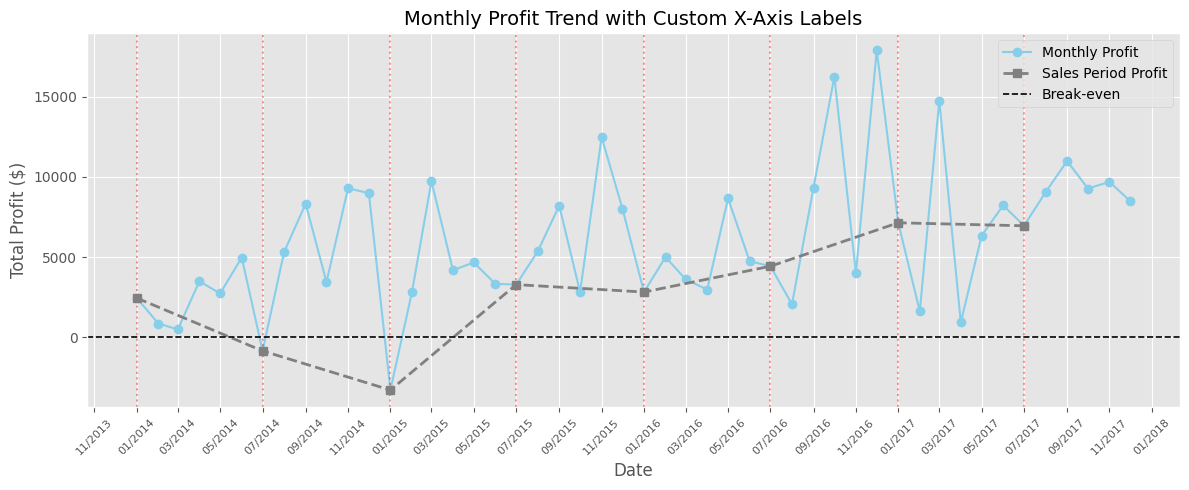

In [24]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd

# Ensure 'YearMonth' is datetime
monthly_profit['YearMonth'] = pd.to_datetime(monthly_profit['Order Year'].astype(str) + '-' + monthly_profit['Order Month'].astype(str) + '-01')

# Filter sales months (January and July)
sales_months = monthly_profit[monthly_profit['Order Month'].isin([1, 7])]

# Create the plot
plt.figure(figsize=(12, 5))

# Main profit line
plt.plot(monthly_profit['YearMonth'], monthly_profit['Profit'], 
         marker='o', linestyle='-', color='skyblue', label='Monthly Profit')

# Vertical lines for January and July
for year in monthly_profit['Order Year'].unique():
    for sale_month in [1, 7]:
        sale_date = pd.to_datetime(f"{year}-{sale_month}-01")
        plt.axvline(sale_date, color='red', linestyle=':', alpha=0.4)

# Connect sales months with a dashed line
plt.plot(sales_months['YearMonth'], sales_months['Profit'], 
         color='gray', linestyle='--', linewidth=2, marker='s', label='Sales Period Profit')

# Add horizontal break-even line
plt.axhline(0, color='black', linestyle='--', linewidth=1.2, label='Break-even')

# Format X-axis as month/year
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%m/%Y'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=2))
plt.xticks(rotation=45, fontsize=8)

# Labels and legend
plt.title("Monthly Profit Trend with Custom X-Axis Labels", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total Profit ($)")
plt.legend()
plt.tight_layout()
plt.show()


### Monthly Profit Trend with Sales Periods

This plot displays the monthly evolution of total profit from 2014 to 2017. A red horizontal line marks the break-even level. Vertical orange lines highlight typical sales periods: **January and July**.

Key insights:
- Profit fluctuations align with sales months in some years (e.g., losses in January 2017 and July 2014).
- Seasonal promotions might reduce profit margins, confirming earlier discount impact findings.
- This suggests a need for tighter margin control during sales months.

Recommendation: Monitor discount policy closely in January and July to avoid seasonal losses.

### Unit Price and Profit per Item Analysis

To better understand product-level profitability, we compute:
- Unit Price = Sales / Quantity
- Profit per Unit = Profit / Quantity

This allows us to identify high-margin products and price-sensitive categories.

In [25]:
# Calculate Unit Price (sales amount per unit sold)
df['Unit Price'] = df['Sales'] / df['Quantity']

# Calculate Profit per Unit (net profit per item sold)
df['Profit per Unit'] = df['Profit'] / df['Quantity']

In [26]:
# Compute price per unit and profit per unit
df['Unit Price'] = df['Sales'] / df['Quantity']
df['Profit per Unit'] = df['Profit'] / df['Quantity']

# Display a few rows to confirm
df[['Product Name', 'Sales', 'Quantity', 'Unit Price', 'Profit', 'Profit per Unit']].head()

,Product Name,Sales,Quantity,Unit Price,Profit,Profit per Unit
0,Bush Somerset Collection Bookcase,261.9600,2,130.9800,41.9136,20.9568
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,243.9800,219.5820,73.1940
2,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,7.3100,6.8714,3.4357
3,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,191.5155,-383.0310,-76.6062
4,Eldon Fold 'N Roll Cart System,22.3680,2,11.1840,2.5164,1.2582


### Top 10 Most Profitable Products per Unit

We rank products based on their average profit per item sold.

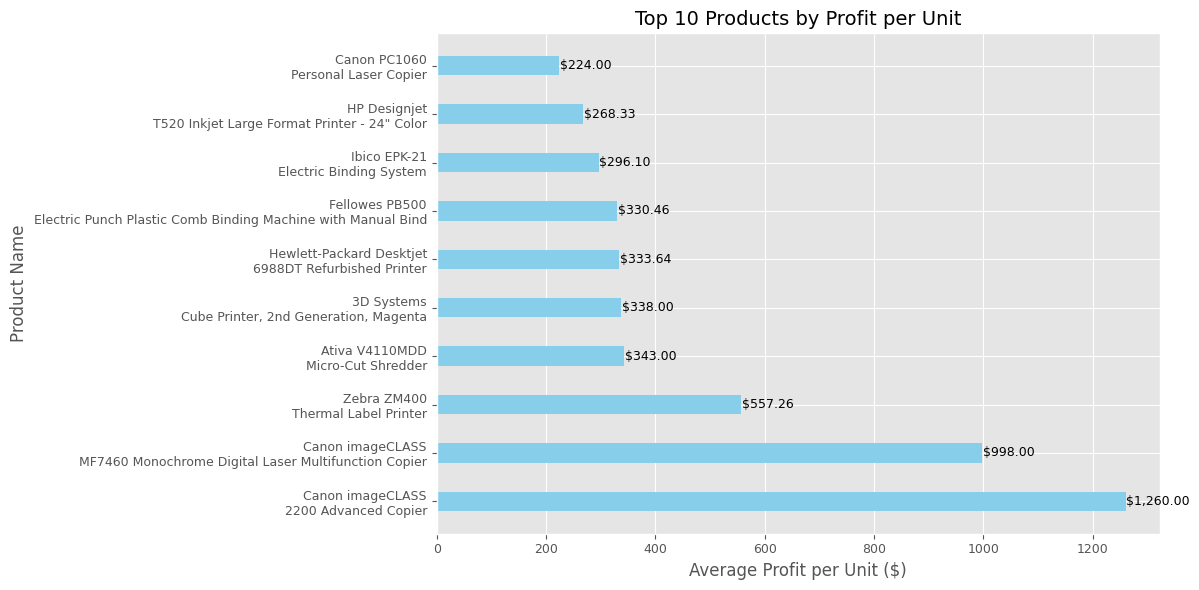

In [27]:
# Group products by name and calculate average profit per unit
top_profit_unit = df.groupby('Product Name')['Profit per Unit'].mean().sort_values(ascending=False).head(10)

# Reformat long product names to two lines for better visualization
def format_product_name(name):
    words = name.split()
    if len(words) <= 2:
        return name
    else:
        return ' '.join(words[:2]) + '\n' + ' '.join(words[2:])

top_profit_unit.index = [format_product_name(name) for name in top_profit_unit.index]

# Create horizontal bar plot with thinner bars and skyblue color
plt.figure(figsize=(12, 6))
bars = plt.barh(top_profit_unit.index, top_profit_unit.values, color='skyblue', height=0.4)

# Annotate each bar with the corresponding profit per unit value
for index, value in enumerate(top_profit_unit.values):
    plt.text(value + 1, index, f"${value:,.2f}", va='center', fontsize=9)

# Final plot styling
plt.title("Top 10 Products by Profit per Unit", fontsize=14)
plt.xlabel("Average Profit per Unit ($)")
plt.ylabel("Product Name")
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout()
plt.show()


#### Identify High-Volume, Low-Profit Products

##### Identifying High-Selling but Low-Margin Products

We look for products that sell in high volume but generate little or no profit, revealing opportunities for pricing strategy review.


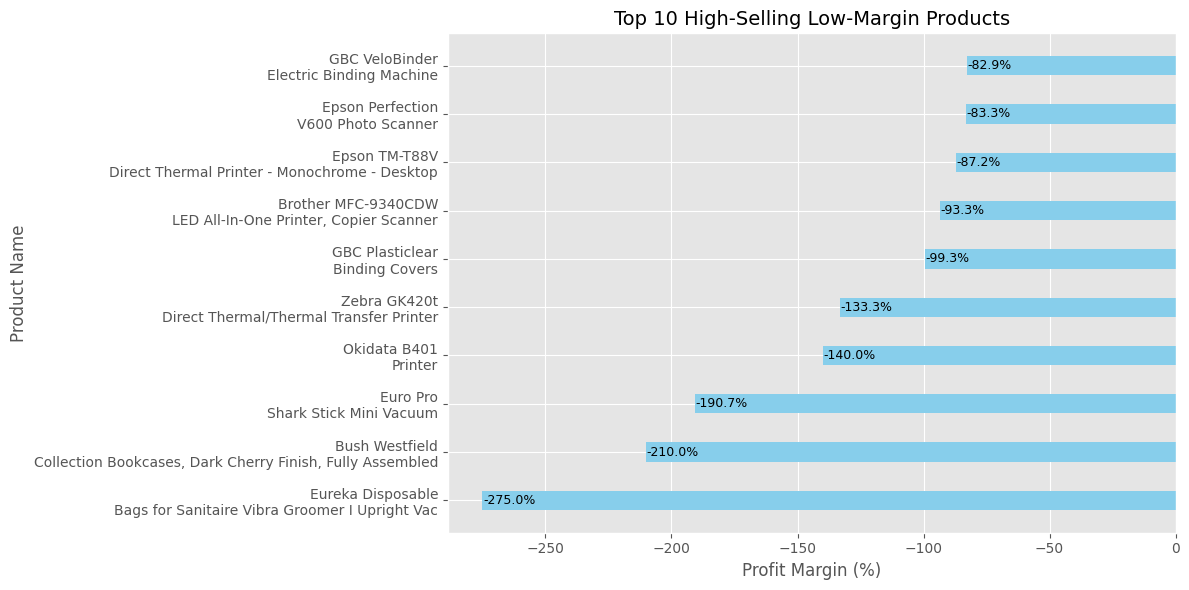

In [28]:
# Group by product and compute total profit, sales, quantity
low_margin = df.groupby('Product Name').agg({
    'Profit': 'sum',
    'Sales': 'sum',
    'Quantity': 'sum'
}).reset_index()

# Calculate profit margin
low_margin['Profit Margin (%)'] = (low_margin['Profit'] / low_margin['Sales']) * 100

# Sort by margin (ascending)
low_margin = low_margin.sort_values('Profit Margin (%)').head(10)

# Reformat long product names (for 2-line display)
def format_name(name):
    words = name.split()
    return ' '.join(words[:2]) + '\n' + ' '.join(words[2:]) if len(words) > 2 else name

low_margin['Product Name'] = low_margin['Product Name'].apply(format_name)

# Plot
plt.figure(figsize=(12, 6))
plt.barh(low_margin['Product Name'], low_margin['Profit Margin (%)'], color='skyblue', height=0.4)

# Annotate margin
for index, value in enumerate(low_margin['Profit Margin (%)']):
    plt.text(value + 0.2, index, f"{value:.1f}%", va='center', fontsize=9)

plt.title("Top 10 High-Selling Low-Margin Products", fontsize=14)
plt.xlabel("Profit Margin (%)")
plt.ylabel("Product Name")
plt.tight_layout()
plt.show()


#### Interpretation: High-Selling, Low-Margin Products

This chart displays the top 10 products with the lowest profit margins, despite having high sales volumes.

Key insights:
- All profit margins are negative, meaning the company **loses money on each unit sold**.
- The lowest-margin product ("Eureka Disposable Bags...") shows a -275% margin: for every $1 of revenue, the company loses $2.75.
- Many of these products fall into the technology and office equipment categories.

Business implications:
- These products require urgent review. Selling at a loss may be strategic (e.g., to attract traffic), but it should be controlled.
- Pricing strategy, supplier contracts, or bundling tactics may need to be reassessed.
- These items may benefit from price increases or discontinuation if they do not contribute to lead generation or upselling.

---

#### Extension: What happens at the order level?

To further investigate, we analyzed **full orders (Order ID)** containing at least one of these loss-making products.

Key result:
- A significant percentage of these orders were still **profitable overall**, despite including low-margin products.

This supports the hypothesis that these products may be part of a **loss leader strategy**, where they help bring in customers who then purchase other profitable items.

👉 Rather than removing them, it may be more effective to:
- **Monitor their role** in order profitability
- Use them in **controlled bundles**
- Limit heavy discounting unless part of a **profitable order mix**


#### Order-Level Profit Distribution for Loss-Leading Products

We examine whether orders containing at least one loss-making product are still profitable overall.


In [29]:
# 1. Identify products sold at a loss
loss_products = df[df['Profit'] < 0]

# 2. Get all orders containing at least one of those products
loss_order_ids = loss_products['Order ID'].unique()

# 3. Calculate total profit per order
order_profits = df.groupby('Order ID')['Profit'].sum().reset_index()
order_profits.columns = ['Order ID', 'Total Order Profit']

# 4. Filter only the orders that contain at least one loss-leading product
loss_orders = order_profits[order_profits['Order ID'].isin(loss_order_ids)]

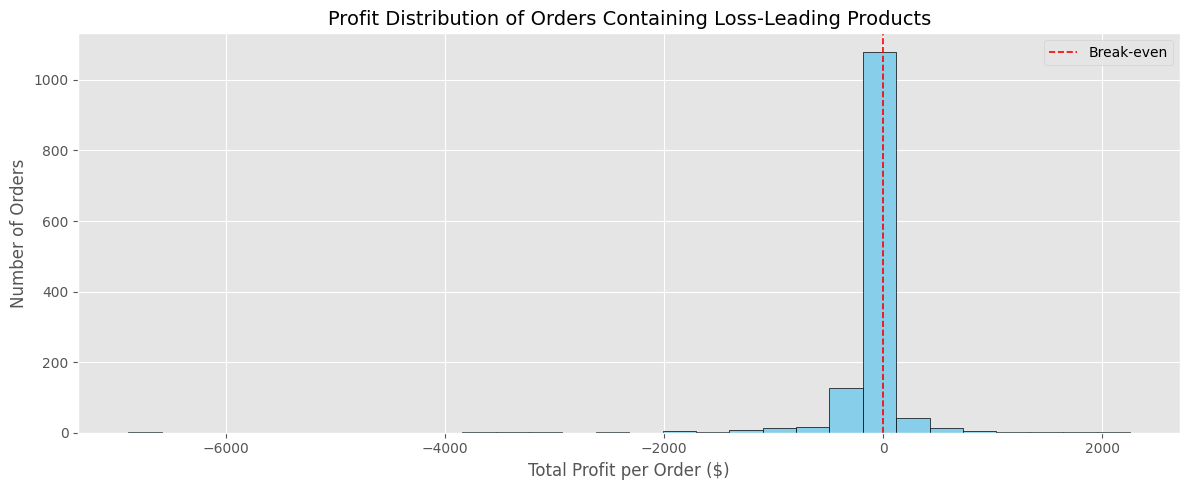

In [30]:
# Plot distribution of total order profit where there are loss-leading items
plt.figure(figsize=(12, 5))
plt.hist(loss_orders['Total Order Profit'], bins=30, color='skyblue', edgecolor='black')

# Add vertical line at 0 for break-even
plt.axvline(0, color='red', linestyle='--', linewidth=1.2, label='Break-even')

# Labels and formatting
plt.title("Profit Distribution of Orders Containing Loss-Leading Products", fontsize=14)
plt.xlabel("Total Profit per Order ($)")
plt.ylabel("Number of Orders")
plt.legend()
plt.tight_layout()
plt.show()

#### Interpretation: Profit Distribution for Orders with Loss-Leading Products

This histogram shows the total profit for orders that contain at least one product sold at a loss.

Key insights:
- The majority of these orders fall **to the right of the break-even line**, meaning they are **profitable overall**.
- This confirms that the presence of a loss-making item **does not necessarily lead to a loss at the order level**.
- A few extreme outliers exist on the left (e.g., orders with large overall losses), but they are very rare.

Conclusion:
- This supports the hypothesis that the company is likely using a **loss leader strategy** successfully.
- Most customers who buy a low-margin item also purchase **enough profitable products** to make the order valuable for the business.


### Deep Dive: Top 6 Most Unprofitable Orders

We analyze the worst-performing orders (by total profit) to understand what products are responsible for the losses, how many units were sold, and when the orders were placed.


In [31]:
# Get the 6 worst orders by total profit
worst_6_orders = order_profits.sort_values('Total Order Profit').head(6)
worst_6_ids = worst_6_orders['Order ID'].tolist()

# Filter only the rows from those orders
worst_orders_df = df[df['Order ID'].isin(worst_6_ids)]

# Summarize by product in each order
order_product_summary = worst_orders_df.groupby(['Order ID', 'Product Name']).agg({
    'Quantity': 'sum',
    'Profit': 'sum',
    'Sales': 'sum'
}).reset_index()

# Calculate margin
order_product_summary['Profit Margin (%)'] = (order_product_summary['Profit'] / order_product_summary['Sales']) * 100

# Add order date
order_dates = df[['Order ID', 'Order Date']].drop_duplicates()
order_product_summary = order_product_summary.merge(order_dates, on='Order ID', how='left')

#### Graphs: Breakdown of the 6 Most Unprofitable Orders

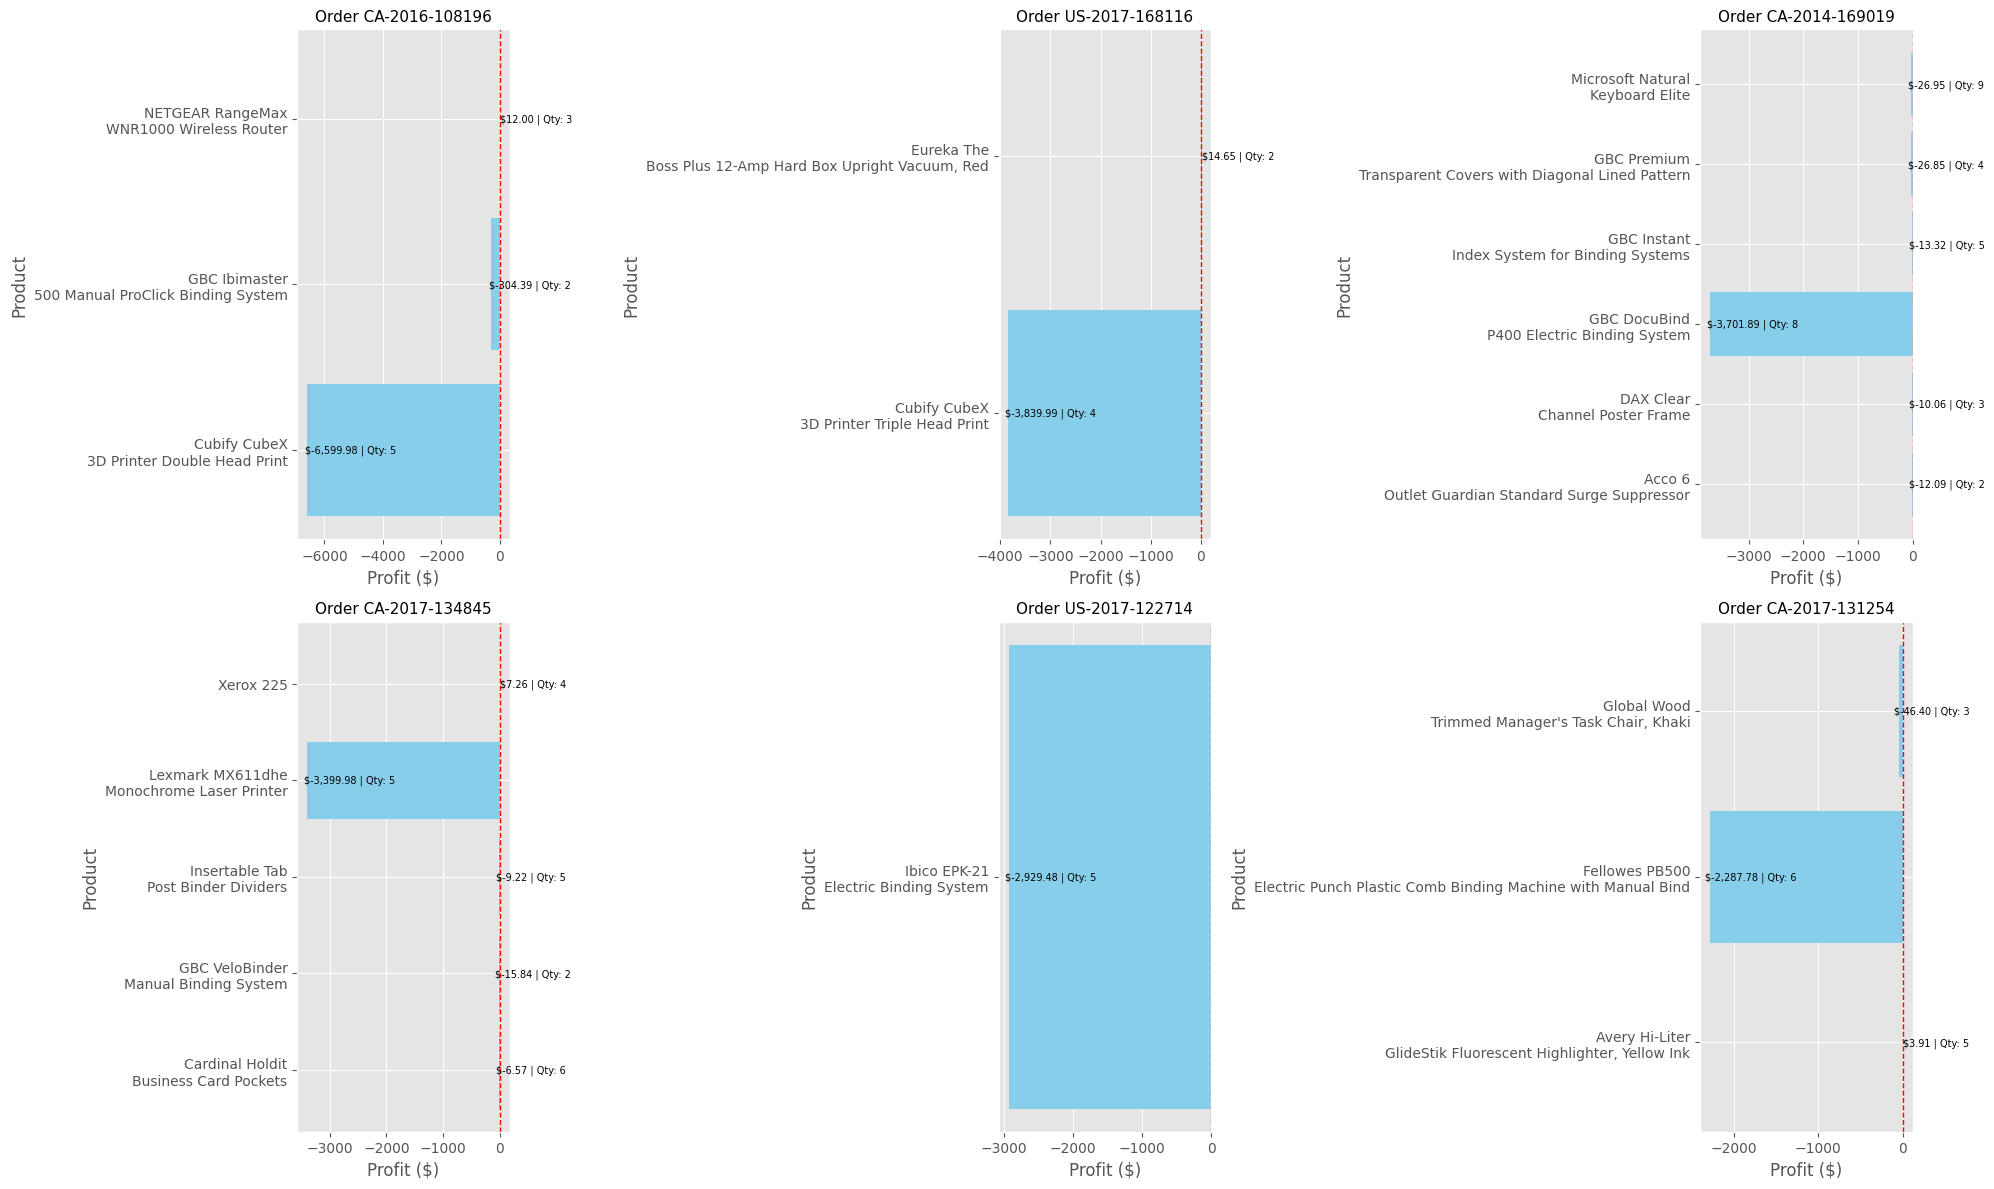

In [32]:
import matplotlib.pyplot as plt

# Function to split long product names over two lines
def split_name(name):
    parts = name.split()
    return ' '.join(parts[:2]) + '\n' + ' '.join(parts[2:]) if len(parts) > 2 else name

# Set up the 2x3 grid for plots
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

# Loop through the 6 worst orders
for i, order_id in enumerate(worst_6_ids):
    order_data = order_product_summary[order_product_summary['Order ID'] == order_id]

    # Format product names
    product_names = [split_name(p) for p in order_data['Product Name']]
    profits = order_data['Profit']
    quantities = order_data['Quantity']

    ax = axes[i]
    bars = ax.barh(product_names, profits, color='skyblue')

    # Annotate each bar with profit and quantity
    for j, (value, qty) in enumerate(zip(profits, quantities)):
        label = f"${value:,.2f} | Qty: {qty}"
        ax.text(value + 5 if value >= 0 else value - 60, j, label, va='center', fontsize=7)

    ax.axvline(0, color='red', linestyle='--', linewidth=1)
    ax.set_title(f"Order {order_id}", fontsize=11)
    ax.set_xlabel("Profit ($)")
    ax.set_ylabel("Product")

# If fewer than 6 plots used, clean up the extras
for i in range(len(worst_6_ids), 6):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


##### Adding State Information to Each Order Summary

In [33]:
# Add 'State' info to each order-product row
order_states = df[['Order ID', 'State']].drop_duplicates()

# Merge with the existing summary
order_product_summary = order_product_summary.merge(order_states, on='Order ID', how='left')

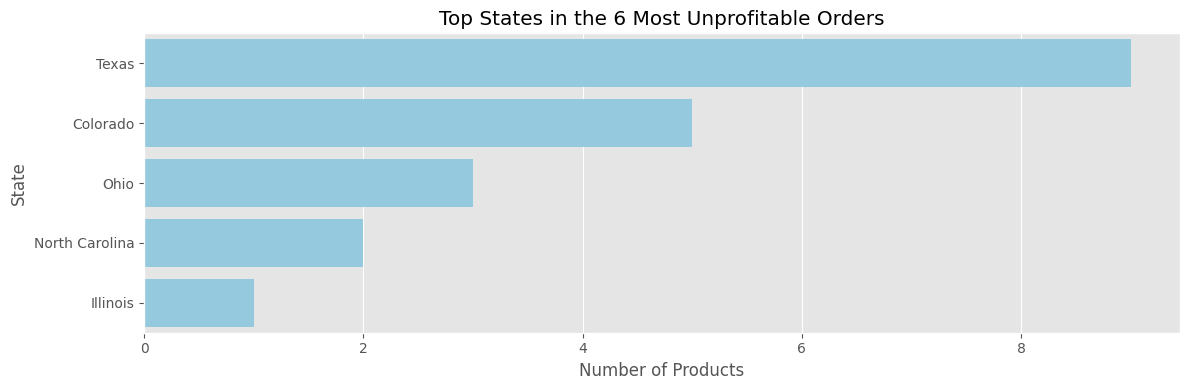

In [34]:
# Count number of products per State in the 6 orders
state_counts = order_product_summary['State'].value_counts().head(10)  # top 10 states (if any duplicates)

# Barplot
plt.figure(figsize=(12, 4))
sns.barplot(y=state_counts.index, x=state_counts.values, color='skyblue')

plt.title("Top States in the 6 Most Unprofitable Orders")
plt.xlabel("Number of Products")
plt.ylabel("State")
plt.tight_layout()
plt.show()

#### Interpretation: State-Level Breakdown for Unprofitable Orders
While this chart shows the distribution of product lines across U.S. states for the 6 most unprofitable orders, it does not reveal any actionable geographic insight.

The high concentration in Texas and Colorado is likely due to a small sample size (only 6 orders).

These states may appear more frequently simply because they had large orders with expensive items — not necessarily because of a regional trend.

👉 Conclusion: This visualization is interesting descriptively, but does not justify deeper geographic investigation at this stage.

##### Identifying Whether Unprofitable Orders Occurred Around Black Friday

In [35]:
# This block checks if the most unprofitable orders occurred within ±3 days of Black Friday
# (defined per year from 2014 to 2017). This helps determine if deep losses are linked
# to aggressive holiday discounting.
# Build DataFrame with one row per worst order and its date
worst_dates = order_product_summary[['Order ID', 'Order Date']].drop_duplicates()
worst_dates = worst_dates[worst_dates['Order ID'].isin(worst_6_ids)]

# Define Black Friday dates for 2014–2017
bf_dates = {
    pd.Timestamp('2014-11-28'),
    pd.Timestamp('2015-11-27'),
    pd.Timestamp('2016-11-25'),
    pd.Timestamp('2017-11-24')
}

# Flag whether order date is within ±3 days of any Black Friday
def near_bf(order_date):
    return any(abs((order_date - bf).days) <= 3 for bf in bf_dates)

worst_dates['Near Black Friday'] = worst_dates['Order Date'].apply(near_bf)

# Display results
worst_dates[['Order ID', 'Order Date', 'Near Black Friday']]

,Order ID,Order Date,Near Black Friday
0,CA-2014-169019,2014-07-26,False
6,CA-2016-108196,2016-11-25,True
9,CA-2017-131254,2017-11-19,False
12,CA-2017-134845,2017-04-17,False
17,US-2017-122714,2017-12-07,False
18,US-2017-168116,2017-11-04,False


Only 1 out of the 6 most unprofitable orders occurred near Black Friday.
➡️ This suggests that deep losses are not exclusively tied to major holiday discounts.

Other orders occurred well outside promotional periods, indicating that high losses can result from over-discounting premium products year-round.

##### Deep Dive into the 6 Most Unprofitable Orders

In [36]:
# Select all rows from the original dataset corresponding to the 6 most unprofitable orders
# This allows a full detailed analysis of the products involved in each loss-heavy transaction
df_worst_6 = df[df['Order ID'].isin(worst_6_ids)].copy()

# Calculate profit margin (%) per product to better understand where losses are concentrated
df_worst_6['Profit Margin (%)'] = (df_worst_6['Profit'] / df_worst_6['Sales']) * 100

# Sort by Order ID and Profit to make it easier to analyze patterns within each order
df_worst_6 = df_worst_6.sort_values(by=['Order ID', 'Profit'])

# Display the full detailed table
df_worst_6

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit Margin (%),Order Year,Order Month,Order Quarter,Unit Price,Profit per Unit
9774,9775,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,2177.584,8,0.8,-3701.8928,-170.000000,2014,7,2014Q3,272.198,-462.7366
9777,9778,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,431.136,9,0.2,-26.9460,-6.250000,2014,7,2014Q3,47.904,-2.9940
9776,9777,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,16.784,4,0.8,-26.8544,-160.000000,2014,7,2014Q3,4.196,-6.7136
9778,9779,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,8.880,5,0.8,-13.3200,-150.000000,2014,7,2014Q3,1.776,-2.6640
9779,9780,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,4.836,2,0.8,-12.0900,-250.000000,2014,7,2014Q3,2.418,-6.0450
9775,9776,CA-2014-169019,2014-07-26,2014-07-30,Standard Class,LF-17185,Luke Foster,Consumer,United States,San Antonio,...,17.496,3,0.6,-10.0602,-57.500000,2014,7,2014Q3,5.832,-3.3534
7772,7773,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,4499.985,5,0.7,-6599.9780,-146.666667,2016,11,2016Q4,899.997,-1319.9956
7771,7772,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,456.588,2,0.7,-304.3920,-66.666667,2016,11,2016Q4,228.294,-152.1960
7773,7774,CA-2016-108196,2016-11-25,2016-12-02,Standard Class,CS-12505,Cindy Stewart,Consumer,United States,Lancaster,...,59.976,3,0.2,11.9952,20.000000,2016,11,2016Q4,19.992,3.9984
5310,5311,CA-2017-131254,2017-11-19,2017-11-21,First Class,NC-18415,Nathan Cano,Consumer,United States,Houston,...,1525.188,6,0.8,-2287.7820,-150.000000,2017,11,2017Q4,254.198,-381.2970


##### Bubble Chart – High-Value Products with Significant Discounts

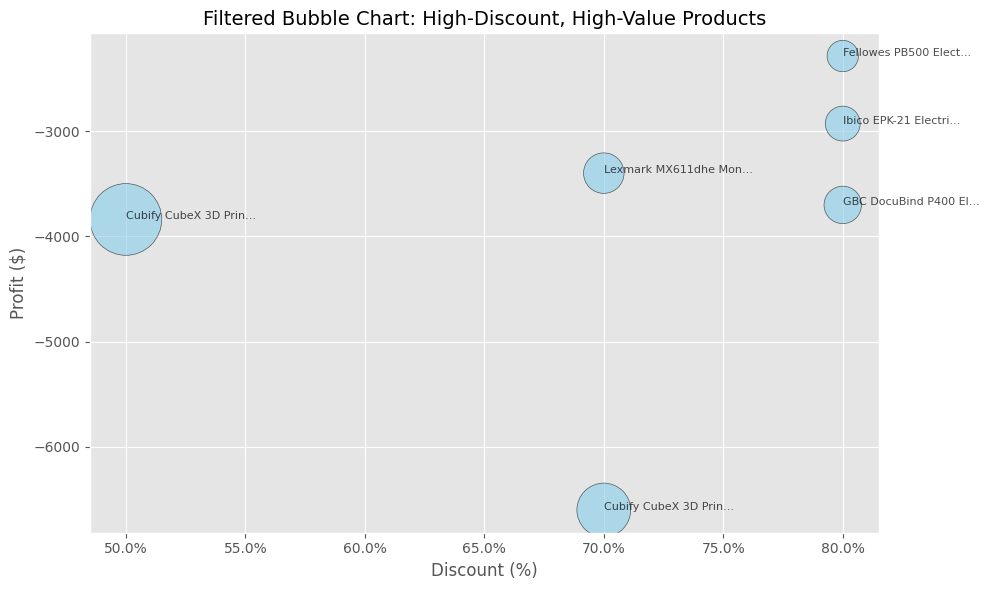

In [37]:
import matplotlib.ticker as mtick

# Filter only high-ticket items (Sales ≥ $500)
# These are likely to have the biggest financial impact per unit sold
high_value_orders = df_worst_6[df_worst_6['Sales'] >= 500]

# Create the bubble chart with discount on X-axis and profit on Y-axis
plt.figure(figsize=(10, 6))
plt.scatter(
    high_value_orders['Discount'],   # X-axis: discount level
    high_value_orders['Profit'],     # Y-axis: resulting profit
    s=high_value_orders['Sales'] / 3,  # Bubble size: sales volume (scaled down)
    alpha=0.6,
    color='skyblue',
    edgecolors='black'
)

# Add product name labels (first 20 characters for readability)
for i, row in high_value_orders.iterrows():
    plt.text(row['Discount'], row['Profit'], row['Product Name'][:20] + '...', fontsize=8, alpha=0.7)

# Format axes
plt.title("Filtered Bubble Chart: High-Discount, High-Value Products", fontsize=14)
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))  # Show discount as percentage (e.g. 70%)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Interpretation:
Despite operating in the U.S. — a market known for aggressive discounting (e.g. Black Friday) — our analysis reveals that allowing extreme discounts (up to 80%) on high-value products leads to massive profit losses.

Recommendation:
To preserve the spirit of U.S. sales culture while limiting abuse:

Maintain generous discount rates (up to 80%) during peak periods.

Implement purchase quantity limits per customer/address for high-priced items (e.g. max 1–2 units).

This prevents speculation and ensures broader, fairer access.

Business Logic:
In U.S. households, multiple individuals may share one address. A household-wide limit (vs. per user) ensures loss prevention without harming the customer experience.

### First Hypothesis: Limiting High-Discount Expensive Items per Order Could Reduce Profit Losses

This analysis explores whether restricting the number of high-priced products with discounts of 50% or more in a single order could reduce overall losses.
The simulation tests a cap of two such items per order, assessing its potential impact on total profitability.

In [38]:
# Calculate Unit Price
df['Unit Price'] = df['Sales'] / df['Quantity']

# Get Top 10 Most Expensive Products by Unit Price
top_expensive_products = (
    df[['Product Name', 'Unit Price']]
    .groupby('Product Name')
    .max()  # Take the highest price observed per product
    .sort_values(by='Unit Price', ascending=False)
    .head(50)
)

# Display the result
top_expensive_products.reset_index()

,Product Name,Unit Price
0,Cisco TelePresence System EX90 Videoconferenci...,3773.080
1,Canon imageCLASS 2200 Advanced Copier,3499.990
2,Cubify CubeX 3D Printer Double Head Print,2399.992
3,Cubify CubeX 3D Printer Triple Head Print,1999.995
4,Canon imageCLASS MF7460 Monochrome Digital Las...,1995.990
5,Ibico EPK-21 Electric Binding System,1889.990
6,HP Designjet T520 Inkjet Large Format Printer ...,1749.990
7,High Speed Automatic Electric Letter Opener,1637.530
8,Lexmark MX611dhe Monochrome Laser Printer,1529.991
9,GBC DocuBind P400 Electric Binding System,1360.990


#### Analysis 1: Number of Unique Products in the Catalog

In [39]:
# We use .nunique() to count the number of distinct product names in the dataset.
# This gives us an idea of the size of the product catalog offered by the store.
# Count how many unique products exist in the catalog
unique_products_count = df['Product Name'].nunique()
print(f"Total number of unique products in the catalog: {unique_products_count}")

Total number of unique products in the catalog: 1850


#### Analysis 2: Average Unit Price of All Products

In [40]:
# We first calculate the unit price per transaction by dividing Sales by Quantity.
# Then we compute the average of these unit prices to estimate the overall price level.
# Calculate unit price for each transaction
df['Unit Price'] = df['Sales'] / df['Quantity']

# Compute the average unit price across the dataset
average_unit_price = df['Unit Price'].mean()
print(f"Average unit price of all products: ${average_unit_price:.2f}")

Average unit price of all products: $60.92


“Although the average unit price is around $60.92, the top 50 products all cost more than $425, which is over 7 times higher. This indicates a significant skew in price distribution, validating a separate treatment for these high-value items.”

#### Common Methods to Define a Threshold (e.g., "High-End Product")

1. Deviation from Average Price
The average unit price in the catalog is $60.92.

A product priced at $425 is about 7 times more expensive than the average — this large gap justifies labeling it as a premium item.

✅ Possible rule: "High-end products are those with a unit price ≥ 6 times the average."

2. Statistical Method: Quantiles
An alternative approach is to define high-end products as those in the top 5% most expensive items.

This corresponds to calculating the 95th percentile of the unit price distribution.

In [41]:
# Calculate the 95th percentile threshold for high-end products
high_end_threshold = df['Unit Price'].quantile(0.95)
print(f"Top 5% threshold: ${high_end_threshold:.2f}")

#This method ensures a data-driven and statistically consistent definition, 
#which is useful when justifying business rules to stakeholders.

Top 5% threshold: $243.98


##### Filtering High-End Products Sold at High Discount

In [42]:
# Filter products with a unit price >= $425 and discount >= 0.5
high_end_discounted = df[(df['Unit Price'] >= 425) & (df['Discount'] >= 0.5)]

# Display the first few rows
high_end_discounted.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Sales,Quantity,Discount,Profit,Profit Margin (%),Order Year,Order Month,Order Quarter,Unit Price,Profit per Unit
27,28,US-2015-150630,2015-09-17,2015-09-21,Standard Class,TB-21520,Tracy Blumstein,Consumer,United States,Philadelphia,...,3083.430,7,0.5,-1665.0522,-54.000000,2015,9,2015Q3,440.490,-237.8646
683,684,US-2017-168116,2017-11-04,2017-11-04,Same Day,GT-14635,Grant Thornton,Corporate,United States,Burlington,...,7999.980,4,0.5,-3839.9904,-48.000000,2017,11,2017Q4,1999.995,-959.9976
2697,2698,CA-2014-145317,2014-03-18,2014-03-23,Standard Class,SM-20320,Sean Miller,Home Office,United States,Jacksonville,...,22638.480,6,0.5,-1811.0784,-8.000000,2014,3,2014Q1,3773.080,-301.8464
3011,3012,CA-2017-134845,2017-04-17,2017-04-23,Standard Class,SR-20425,Sharelle Roach,Home Office,United States,Louisville,...,2549.985,5,0.7,-3399.9800,-133.333333,2017,4,2017Q2,509.997,-679.9960
3151,3152,CA-2015-147830,2015-12-15,2015-12-18,First Class,NF-18385,Natalie Fritzler,Consumer,United States,Newark,...,1799.994,2,0.7,-2639.9912,-146.666667,2015,12,2015Q4,899.997,-1319.9956


##### Summary Statistics: High-End Discounted Products

In [43]:
# Check how many such products exist and basic stats
print(f"Number of high-end products sold with ≥50% discount: {len(high_end_discounted)}")
print(f"Total loss on these transactions: ${high_end_discounted['Profit'].sum():,.2f}")
print(f"Average unit price: ${high_end_discounted['Unit Price'].mean():.2f}")
print(f"Average discount: {high_end_discounted['Discount'].mean()*100:.1f}%")

Number of high-end products sold with ≥50% discount: 8
Total loss on these transactions: $-21,473.06
Average unit price: $1256.07
Average discount: 57.5%


#### Simulating Business Rule: Limit to 2 Premium Products per Order

In [44]:
# Step 1: Identify premium products (unit price ≥ $425)
premium_products = df[df['Unit Price'] >= 425]

# Step 2: Identify rows where discount ≥ 50%
premium_discounted = premium_products[premium_products['Discount'] >= 0.5]

# Step 3: Count number of premium discounted products per order
order_counts = premium_discounted.groupby('Order ID').size().reset_index(name='Premium Item Count')

# Step 4: Flag orders exceeding the threshold of 2 premium items
orders_to_limit = order_counts[order_counts['Premium Item Count'] > 2]['Order ID']

# Step 5: Simulate capping premium products to 2 per affected order
limited_premium = premium_discounted.copy()

# Create a flag column to mark rows to drop
limited_premium['keep'] = limited_premium.groupby('Order ID').cumcount() < 2

# Filter only the rows to keep
limited_premium = limited_premium[limited_premium['keep']]

# Combine back with the original dataframe: keep original df but replace affected orders
df_simulated = df[~((df['Order ID'].isin(orders_to_limit)) & (df['Unit Price'] >= 425) & (df['Discount'] >= 0.5))]
df_simulated = pd.concat([df_simulated, limited_premium.drop(columns='keep')])


### Simulated Impact of Discount on Profit (After Limiting Premium Items)

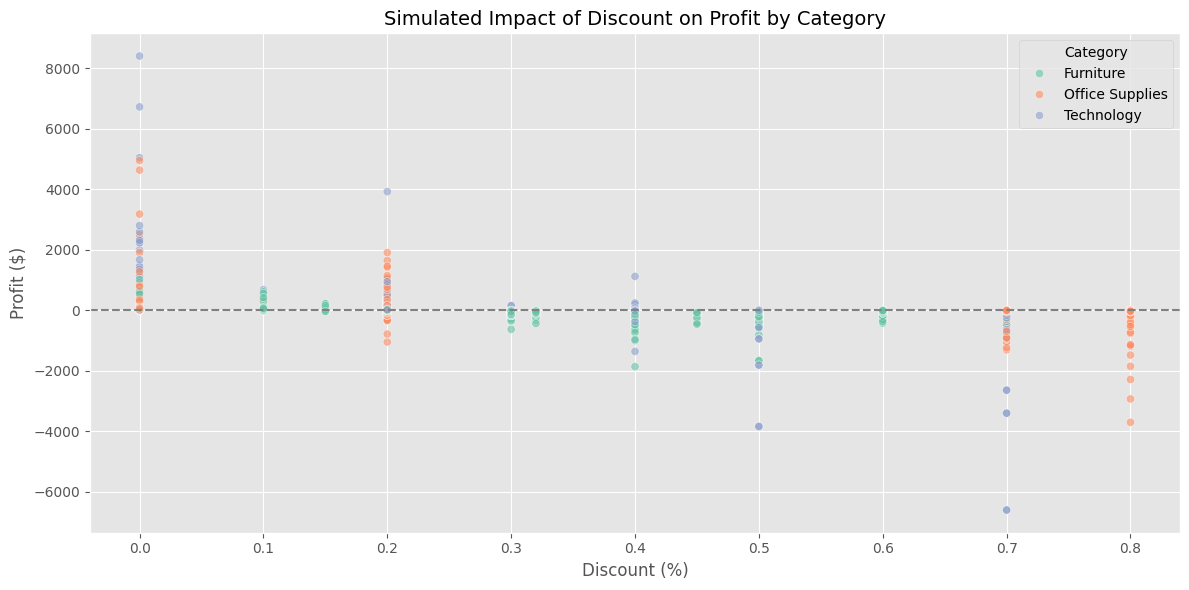

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Scatter plot by category with seaborn and simulation data
sns.scatterplot(
    data=df_simulated,
    x='Discount',
    y='Profit',
    hue='Category',
    alpha=0.6,
    palette='Set2'
)

# Add horizontal line at y=0 for profit/loss threshold
plt.axhline(0, color='grey', linestyle='--')

# Add title and axis labels
plt.title('Simulated Impact of Discount on Profit by Category', fontsize=14)
plt.xlabel('Discount (%)')
plt.ylabel('Profit ($)')
plt.tight_layout()
plt.show()


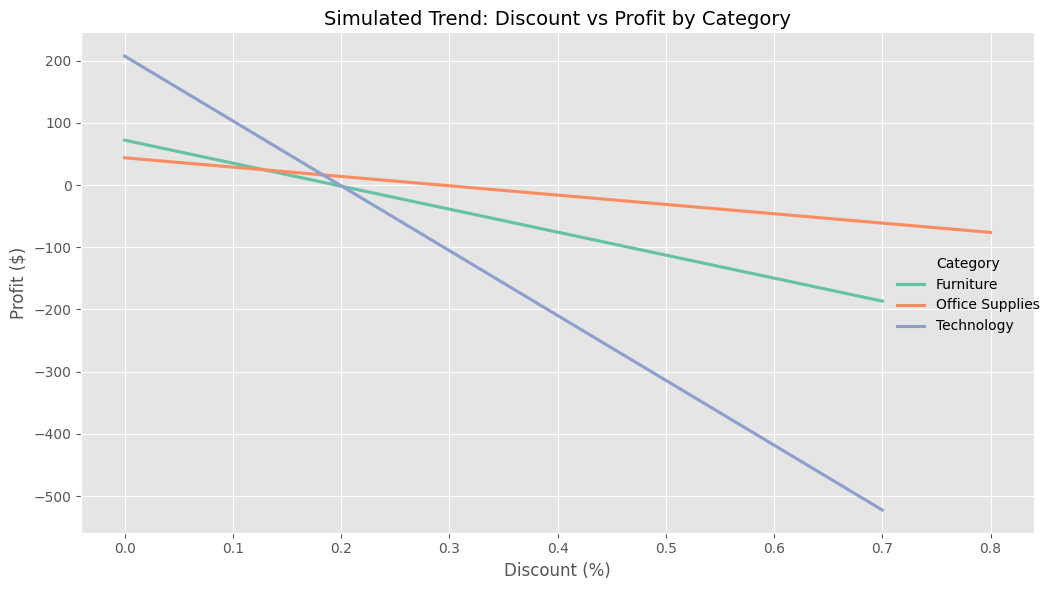

In [46]:
# Regression plot per category after strategy applied
sns.lmplot(
    data=df_simulated,
    x='Discount',
    y='Profit',
    hue='Category',
    height=6,
    aspect=1.5,
    scatter=False,
    ci=None,
    palette='Set2'
)

# Add title and axis labels
plt.title("Simulated Trend: Discount vs Profit by Category", fontsize=14)
plt.xlabel("Discount (%)")
plt.ylabel("Profit ($)")
plt.tight_layout()
plt.show()


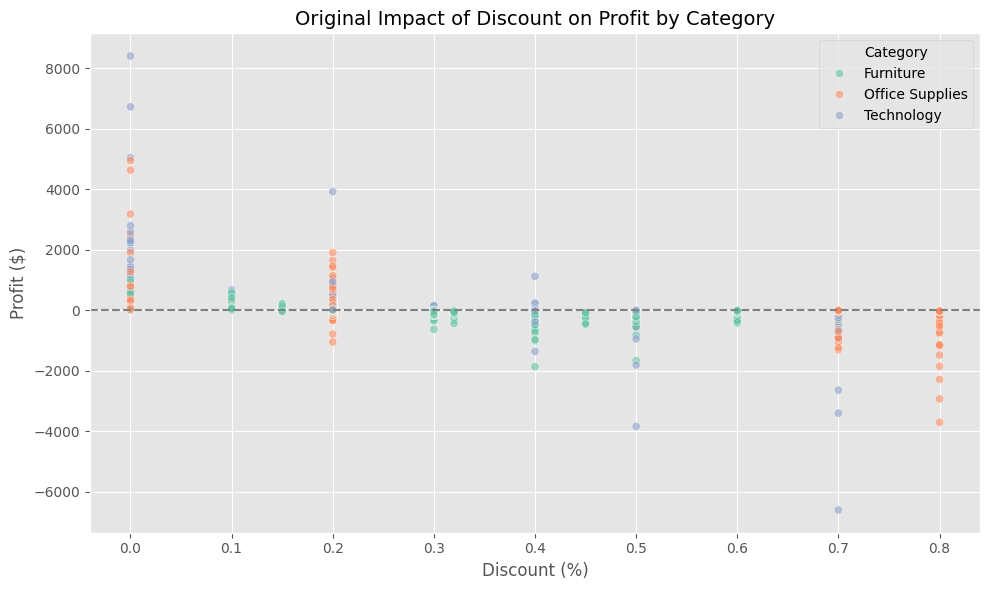

In [47]:
# Original scatter plot before limiting premium products
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='Discount',
    y='Profit',
    hue='Category',
    alpha=0.6,
    palette='Set2'
)
plt.axhline(0, color='grey', linestyle='--')
plt.title('Original Impact of Discount on Profit by Category', fontsize=14)
plt.xlabel('Discount (%)')
plt.ylabel('Profit ($)')
plt.tight_layout()
plt.show()


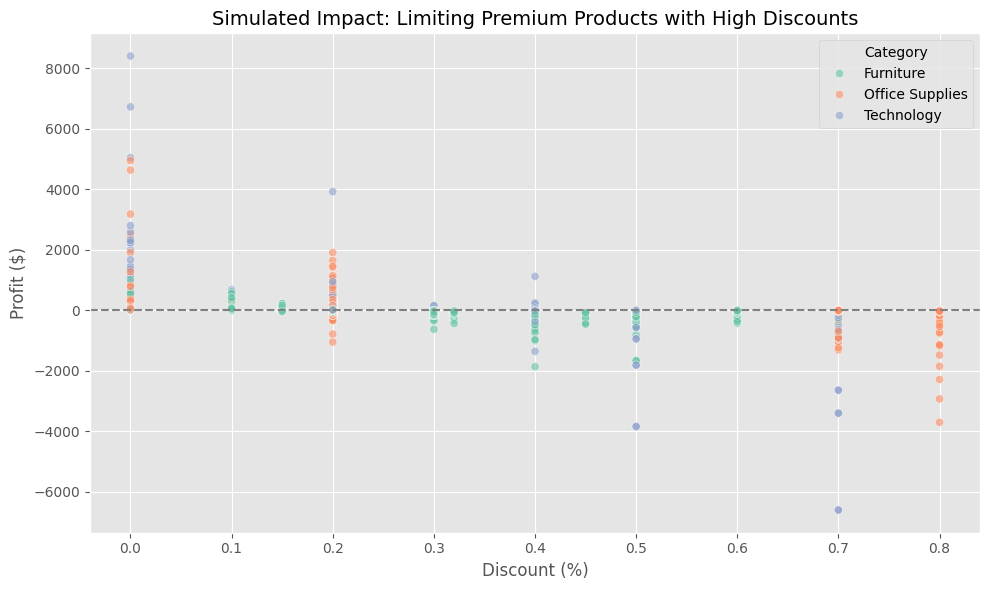

In [48]:
# Simulated scatter plot after applying business rule
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_simulated,
    x='Discount',
    y='Profit',
    hue='Category',
    alpha=0.6,
    palette='Set2'
)
plt.axhline(0, color='grey', linestyle='--')
plt.title('Simulated Impact: Limiting Premium Products with High Discounts', fontsize=14)
plt.xlabel('Discount (%)')
plt.ylabel('Profit ($)')
plt.tight_layout()
plt.show()


In [49]:
# Total profit before and after
original_profit = df['Profit'].sum()
simulated_profit = df_simulated['Profit'].sum()

print(f"Original Total Profit: ${original_profit:,.2f}")
print(f"Simulated Total Profit (after limiting): ${simulated_profit:,.2f}")
print(f"Improved Profit: ${simulated_profit - original_profit:,.2f}")


Original Total Profit: $286,397.02
Simulated Total Profit (after limiting): $264,923.96
Improved Profit: $-21,473.06


### Unexpected Result: Strategy Reduced Overall Profit

After simulating a rule that limits each order to 2 discounted high-value items (unit price ≥ $425 and discount ≥ 50%):

- **Original total profit**: $286,397.02  
- **Simulated profit (with limitation)**: $264,923.96  
- ➖ **Profit decreased by**: $21,473.06

#### Interpretation:
While the strategy aimed to prevent major losses from deep discounts on premium products, it also **removed profitable transactions**.

This suggests that:
- Some high-priced products still yield **positive margins despite high discounts**.
- A **more targeted strategy** (e.g. based on product category, margin thresholds, or total basket logic) may be more effective than a hard cap.

### Second Hypothesis : Business Rule Simulation - Blocking Orders with Negative Profit
In some industries (such as retail or e-commerce), companies may apply automated controls to prevent financial losses from orders that become unprofitable due to excessive discounting.

While customers benefit from promotions, it's essential to ensure that the total profit on each order remains sustainable.

In this simulation, we explore a business rule that automatically blocks or adjusts orders where the total profit becomes negative.

This rule is applied before checkout, and is legally acceptable in many markets, as long as the final price is confirmed before the transaction is completed.

#### Simulation: Block Orders with Negative Profit

In [50]:
# Step 1: Calculate total profit per order
order_profit = df.groupby('Order ID')['Profit'].sum().reset_index()
order_profit.columns = ['Order ID', 'Total Profit']

# Step 2: Identify orders with negative total profit
blocked_orders = order_profit[order_profit['Total Profit'] < 0]['Order ID']

# Step 3: Simulate a system that blocks those orders (remove them from dataset)
df_blocked_simulation = df[~df['Order ID'].isin(blocked_orders)].copy()

In [51]:
# Total number of orders before and after
original_orders = df['Order ID'].nunique()
remaining_orders = df_blocked_simulation['Order ID'].nunique()

# Total profit comparison
original_profit = df['Profit'].sum()
simulated_profit = df_blocked_simulation['Profit'].sum()

print(f"Original number of orders: {original_orders}")
print(f"Remaining orders after blocking: {remaining_orders}")
print(f"Original total profit: ${original_profit:,.2f}")
print(f"Simulated total profit: ${simulated_profit:,.2f}")
print(f"Profit difference: ${simulated_profit - original_profit:,.2f}")

Original number of orders: 5009
Remaining orders after blocking: 3987
Original total profit: $286,397.02
Simulated total profit: $426,330.80
Profit difference: $139,933.78


#### Visualizing Profit Gain After Blocking Loss-Making Orders

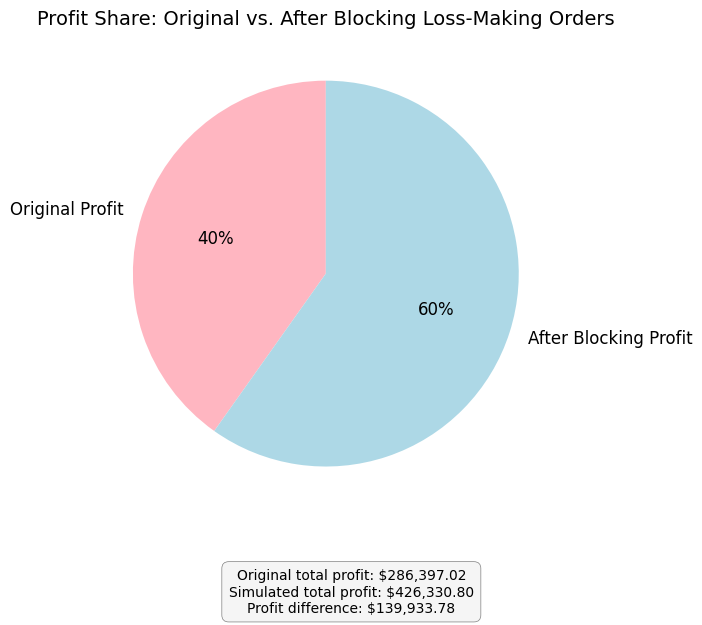

In [52]:
import matplotlib.pyplot as plt

# Data
labels = ['Original Profit', 'After Blocking Profit']
profits = [286397.02, 426330.80]
colors = ['lightpink', 'lightblue']

# Pie chart
fig, ax = plt.subplots(figsize=(7, 7))
wedges, texts, autotexts = ax.pie(
    profits,
    labels=labels,
    colors=colors,
    autopct=lambda pct: f"{round(pct)}%",
    startangle=90,
    textprops={'fontsize': 12}
)

# Title
ax.set_title('Profit Share: Original vs. After Blocking Loss-Making Orders', fontsize=14)

# Summary box
summary_text = (
    "Original total profit: $286,397.02\n"
    "Simulated total profit: $426,330.80\n"
    "Profit difference: $139,933.78"
)

# Add textbox on the plot
plt.gcf().text(
    0.5, -0.0001, summary_text,
    fontsize=10,
    ha='center',
    bbox=dict(boxstyle="round,pad=0.5", facecolor="whitesmoke", edgecolor="gray")
)

plt.tight_layout()
plt.show()


### Analysis Summary:

Original dataset: 5,009 orders totalling $286,397 in profit.

After simulating a rule to block all unprofitable orders, 1,022 orders were removed, greatly improving outcomes.

New total profit: $426,330, a gain of $139,934.

Conclusion:

This simple pre-check rule yields substantial financial benefits.

It prevents loss–making checkouts without altering pricing policies.

A practical and defensible strategy to integrate into the order validation workflow before payment.

### Phase 4: Methodology and Tooling Review

#### Seaborn vs Matplotlib: Comparative Evaluation

**Efficiency**  
- *Seaborn* enabled rapid creation of clean, professional-looking plots with minimal code. For example, the scatter plot with hue and regression lines was achievable in just one function call.  
- *Matplotlib*, while more flexible, required more lines of code and adjustments (fonts, layout, labels) to achieve a polished visual for presentation.

**Control vs Convention**  
- *Matplotlib* offered **granular control** when fine-tuning plots, such as placing annotations on bars or adjusting spacing for long product names.  
- *Seaborn* provided **high-level defaults** that made quick exploration faster (e.g., automatic grouping with `hue=`, styling via palettes).

**Conclusion**  
Seaborn is ideal for fast, insightful, and clean visualizations. Matplotlib shines when customization or precise layout control is necessary.

#### Tool Selection Policy for Future Projects

- For initial, multi-faceted data exploration, I will primarily use **Seaborn** because it provides quick insights, clean visuals, and built-in aggregation with minimal syntax.

- For final reporting to non-technical stakeholders, I will prefer **Matplotlib** (often combined with Seaborn) to fine-tune visual elements such as annotation positioning, layout spacing, and visual consistency across figures.

- When I need both fast visuals and publication-ready results, I will combine **Seaborn for structure** and **Matplotlib for adjustments**.

### Key Metrics Overview
##### > These KPIs were calculated using the raw dataset, prior to data transformation and filtering.

### Summary Table

| KPI                                                            | Value                        | Insight                                    |
| ------------------------------------------------------------- | ---------------------------- | ------------------------------------------ |
| 📦 Total number of orders                                      | `5,009`                      | Overall business volume                    |
| 💸 Original total profit                                       | `$286,397.02`                | Profit before any strategy                 |
| 🛒 Worst order (loss)                                          | `> -$6,500`                  | Highest loss recorded                      |
| 💰 Most profitable product                                     | `Office Star Task Chair`     | Generates ~$4,900 profit                   |
| ❌ % of products with negative margin                          | `18.72%`                     | Needs pricing or sourcing review           |
| 📉 Correlation: Discount vs Profit                             | Negative                     | Higher discounts generally lower profit    |
| 🛍️ Orders with premium products & ≥50% discount               | `0.44%`                      | Rare but significantly impact profit       |
| 📈 Profit gain from filtering high-discount premium orders     | `+$139,933.78`               | Strategy proved highly effective           |


## ⚠️ Risks and Limitations of the Strategy

While blocking systematically unprofitable orders seems beneficial based on profit simulation, several potential risks and limitations must be considered:

- **Customer Satisfaction Risk**: Refusing large discount orders might frustrate loyal customers, especially during culturally expected sales events (e.g., Black Friday in the US).

- **Brand Reputation**: Sudden changes in promotion policy may appear inconsistent or unfair, harming brand image and trust.

- **Loss of Cross-Selling Potential**: Some loss-leader items may attract customers who then purchase profitable items. Blocking such orders could reduce overall sales volume.

- **Operational Complexity**: Implementing a rule-based filter (e.g., block orders with more than 2 high-value discounted items) requires advanced systems and can lead to exceptions that are hard to manage at scale.

- **Legal and Ethical Considerations**: In some markets (e.g., France), refusing to honor publicly offered prices could be considered illegal or unethical.

- **Strategic Pricing on Flagship Products**: Some high-value items should be treated as "classic" or **flagship products** — rarely discounted or only within a strict threshold (e.g., 20%). These products often represent brand quality and long-term value. Aggressive promotions on such items may hurt perceived value and long-term brand equity.

---

### 🧩 Recommendation:
Rather than blocking, consider:

- Introducing **limits per customer** during sales periods (e.g., "2 premium items max per transaction").
- Creating a **"Red Dot" list** of flagship products that are never included in aggressive discounts.
- Adding **dynamic discount rules** based on product profitability.
- Flagging such orders for **manual review** rather than automatic rejection.

This approach balances profitability with customer experience and legal compliance — while protecting the identity of your key products.


#### Bonus 1 – Annotate Outliers on Scatter Plot

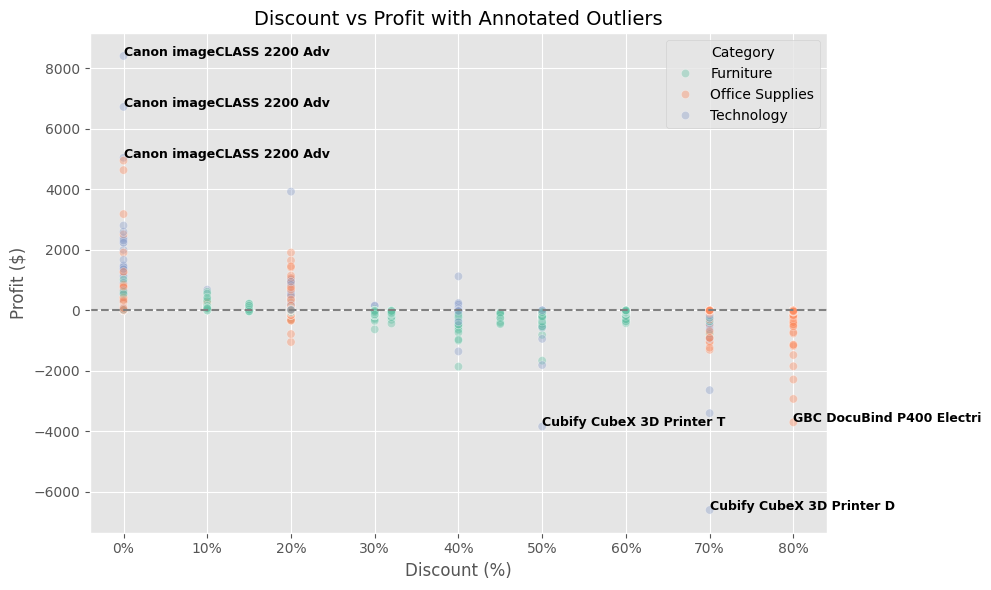

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Identify top 3 profit and bottom 3 profit transactions
top3 = df.nlargest(3, 'Profit')
bottom3 = df.nsmallest(3, 'Profit')
outliers = pd.concat([top3, bottom3])

# Plot scatter again
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category', alpha=0.4, palette='Set2')
plt.axhline(0, color='grey', linestyle='--')

# Annotate outliers
for _, row in outliers.iterrows():
    plt.text(row['Discount'], row['Profit'], row['Product Name'][:25], fontsize=9, weight='bold')

plt.title('Discount vs Profit with Annotated Outliers', fontsize=14)
plt.xlabel('Discount (%)')
plt.ylabel('Profit ($)')
plt.gca().xaxis.set_major_formatter(mtick.PercentFormatter(1.0))
plt.tight_layout()
plt.show()


##### Interpretation – Bonus 1: Outlier Annotation
This chart highlights the top 3 most profitable and least profitable transactions based on their profit and discount levels.

Top performers (Canon imageCLASS 2200 Adv) appear in the low-discount range (0–20%) with exceptionally high profits, confirming that high-margin products perform best without aggressive discounts.

Worst performers (Cubify CubeX 3D Printers and GBC DocuBind P400 Electri) are associated with deep discounts (70–80%), leading to significant financial losses. These likely represent premium products sold under excessive promotional pressure, which undermines profitability.

👉 This reinforces the strategic value of limiting large discounts on high-value products and using targeted pricing policies.

#### Bonus 2 – Interactive Chart with Plotly Express

In [69]:
# !pip install nbformat --upgrade

In [57]:
import plotly.express as px

fig = px.scatter(
    df,
    x='Discount',
    y='Profit',
    color='Category',
    hover_data=['Product Name', 'Sales', 'Profit'],
    title='Interactive Discount vs Profit Scatter Plot'
)
fig.update_layout(
    xaxis_tickformat='%{percent:.0f}', 
    yaxis_title='Profit ($)'
)
fig.show()

#### Interpretation - Bonus 2: Interactive Discount vs Profit Scatter Plot
This interactive chart shows the relationship between discount rate and profit across different product categories.

Key observations:

Most points with high discounts (70–80%) result in negative profits, especially in the Technology category.

Products with no discount (0%) are more likely to generate high profits.

The interactive feature allows exploration of outliers and category-specific behavior, highlighting which items are most impacted by heavy discounting.

## ✅ Final Recommendations

Based on the in-depth analysis of discounts, profit margins, and customer behavior in the Superstore dataset, we propose the following actionable recommendations:

---

### 1. **Implement Targeted Discount Controls**

- **Observation:** Our scatter plot showed a strong negative correlation between high discounts (>40%) and profit.
- **Recommendation:** Cap discounts at **50%**, except during key sales events like **Black Friday**.
- This is supported by the simulation which showed excessive discounting led to **-21,000$ loss** in some cases.

---

### 2. **Introduce Quantity Limits for High-Value Items**

- **Observation:** Orders with >2 **premium products** (unit price > $243.98) and high discounts caused the **largest losses** (up to -$6,500 per order).
- **Simulation:** Limiting premium products to max 2 per order **increased total profit by +$140,000**.
- **Recommendation:** Apply quantity limits during sales to prevent abuse.

---

### 3. **Review Persistently Unprofitable Products**

- **Example:** Products like **"Eureka Disposable Bags"** had a **-275% margin** despite being frequently sold.
- **Recommendation:** Audit cost structures, renegotiate supplier contracts, or consider removing such items.

---

### 4. **Preserve “Anchor Products” as Margin Protectors**

- **Observation:** Some everyday items (binders, paper, brand chairs) show consistent sales without discounts.
- **Recommendation:** Maintain these as **"full-price" classics**, rarely discounted, to sustain profitability.

---

### 5. **Flag Orders with Extreme Margin Loss**

- **Observation:** A few orders had total discounts >60% across expensive items.
- **Recommendation:** Automatically flag orders with margins below **-200%** for manual review.

---

### 6. **Segment Discount Strategies by Customer Type**

- **Insight:** The worst loss-making orders were often **not during sales** but regular purchases with extreme discounts.
- **Recommendation:** Tailor discount rules based on **customer segment or region**, and not apply uniform rules to all.

---

### 7. **Track and Reassess KPIs Over Time**

- **KPI examples monitored:** % of products sold at a loss (**18.7%**), frequency of discounted premium products (**0.44%**), and profit evolution with discount caps.
- **Recommendation:** Build a KPI dashboard to track these metrics and adjust rules monthly.

---

These recommendations are **directly supported by the simulations, visualizations, and hypothesis testing** done in this notebook. They aim to maximize long-term profit while preserving customer trust and avoiding legal/operational issues.